[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Vsriram181/Resume-Screening-With-NLP/blob/main/resume_screening_tf_idf/resume_screening_using_nlp.ipynb)

# Resume Screening with NLP (TF-IDF)

**Project Type** – Multi-class Text Classification  
**Industry** – HR Tech / Recruitment  
**Contribution** – Individual  
**Member Name** – Velidi Sriram Chowdary

---

## Project Summary
Recruiters receive hundreds of resumes for each role, making manual screening slow and inconsistent. This project builds an end-to-end **resume screening system** that classifies resumes into job categories and lays the groundwork for **job-description (JD) matching**. We implemented a **classical NLP approach using TF-IDF** for feature extraction and compared multiple machine learning models for performance.

### Project Highlights
- **Data Preprocessing:** Clean and normalize raw resume text; handle duplicates/empties; optional PII scrubbing.
- **Exploratory Data Analysis (EDA):** Class distribution plots, frequent tokens/skills, and word clouds per category.
- **Feature Extraction:** TF-IDF with unigrams/bigrams and stopwords removal.
- **Models:** Logistic Regression, Linear SVM, Multinomial NB, Random Forest, XGBoost, LightGBM.
- **Evaluation Metrics:** Accuracy, Precision, Recall, F1-score (macro/weighted), Confusion Matrix.
- **Tuning & Optimization:** Stratified train/validation/test split; cross-validation; hyperparameter search.
- **Validation:** Robust generalization checks and error analysis (misclassified resumes).
- **Deployment (Preview):** Simple Streamlit/Gradio demo for uploading a resume and viewing predicted category + confidence.
- **Ethical Considerations:** Bias and fairness across categories, privacy of resume content, and safe handling of PII.

**Future Enhancement:** Integration of **BERT embeddings** or other transformer models could improve semantic understanding of resumes and job descriptions.

**GitHub Link** – _to be added after final polish_

---

## Problem Statement
Hiring teams need a reliable way to **categorize and prioritize resumes**. Manual triage is time-consuming and subject to bias. We aim to build an automated, data-driven system that **classifies resumes into predefined job categories** and can be extended to **match resumes to specific JDs**. The solution should balance **accuracy**, **speed**, and **interpretability**, while respecting privacy and fairness.

## Project Objectives
1. **Data Preprocessing:** Clean text, remove noise, standardize casing, and prepare labels.  
2. **Feature Engineering:** Extract TF-IDF features to represent resumes numerically.  
3. **Model Selection:** Train and evaluate classical ML models.  
4. **Model Evaluation:** Use accuracy, precision, recall, F1-score; visualize confusion matrices and learning curves.  
5. **Hyperparameter Tuning:** Optimize models via grid/random search.  
6. **Cross-Validation & Generalization:** Ensure robust, reproducible performance on unseen data.  
7. **Practical Application:** Provide an interactive demo to simulate real recruiter workflow.  
8. **Ethical Considerations:** Address data privacy, potential bias, and transparent reporting.  
9. **Challenges & Future Work:** Domain adaptation to new roles, JD–resume semantic matching, and integration of transformer-based models like BERT.

---

## Let's Begin!
### 1) Import Libraries


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For NLP
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# For ML Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Download stopwords (first time only)
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Know your data

In [ ]:
# Step 1: Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Set working directory
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/resume filter")

# Step 3: Load dataset
import pandas as pd
df = pd.read_csv("resume_job_matching_dataset.csv")

# Step 4: Check dataset
print("Shape of dataset:", df.shape)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape of dataset: (10000, 3)


,job_description,resume,match_score
0,"Data Analyst needed with experience in SQL, Ex...","Experienced professional skilled in SQL, Power...",4
1,Data Scientist needed with experience in Stati...,"Experienced professional skilled in Python, De...",4
2,Software Engineer needed with experience in Sy...,"Experienced professional skilled in wait, Git,...",5
3,"ML Engineer needed with experience in Python, ...","Experienced professional skilled in return, De...",4
4,Software Engineer needed with experience in RE...,"Experienced professional skilled in REST APIs,...",5


In [ ]:
print(df.columns)

Index(['job_description', 'resume', 'match_score', 'Cleaned_Resume',
       'Cleaned_JD', 'resume_length', 'jd_length', 'resume_clean'],
      dtype='object')


### Data Cleaning & Preprocessing

In [ ]:
#Define stopwords
stop_words = set(stopwords.words("english"))

# Cleaning function
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()  # lowercase
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove punctuation & numbers
    tokens = [word for word in text.split() if word not in stop_words]  # remove stopwords
    return " ".join(tokens)

# Apply cleaning to resume and job_description columns
df["Cleaned_Resume"] = df["resume"].apply(clean_text)
df["Cleaned_JD"] = df["job_description"].apply(clean_text)

# Preview cleaned columns
df[["resume", "Cleaned_Resume", "job_description", "Cleaned_JD"]].head()

,resume,Cleaned_Resume,job_description,Cleaned_JD
0,"Experienced professional skilled in SQL, Power...",experienced professional skilled sql power bi ...,"Data Analyst needed with experience in SQL, Ex...",data analyst needed experience sql excel power...
1,"Experienced professional skilled in Python, De...",experienced professional skilled python deep l...,Data Scientist needed with experience in Stati...,data scientist needed experience statistics pa...
2,"Experienced professional skilled in wait, Git,...",experienced professional skilled wait git syst...,Software Engineer needed with experience in Sy...,software engineer needed experience system des...
3,"Experienced professional skilled in return, De...",experienced professional skilled return democr...,"ML Engineer needed with experience in Python, ...",ml engineer needed experience python computer ...
4,"Experienced professional skilled in REST APIs,...",experienced professional skilled rest apis agi...,Software Engineer needed with experience in RE...,software engineer needed experience rest apis ...


### Exploratory Data Analysis (EDA)

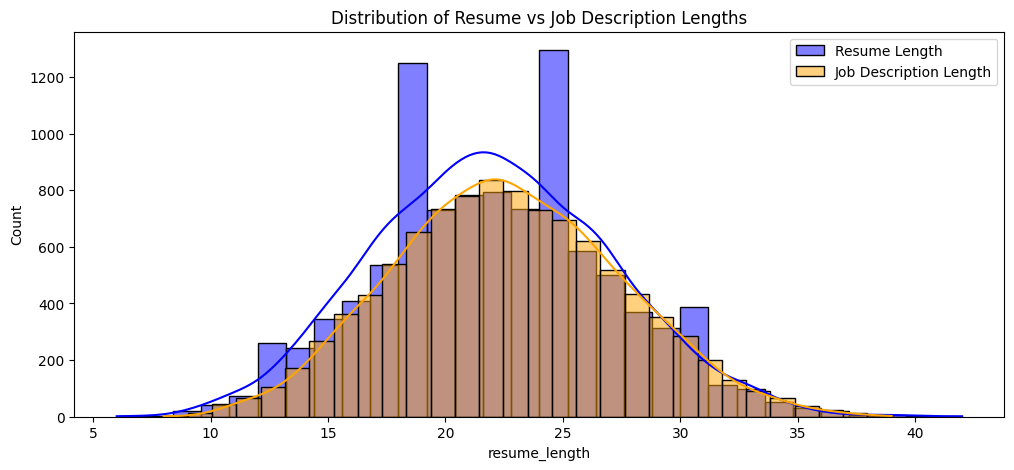

/tmp/ipython-input-3645893239.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="magma")


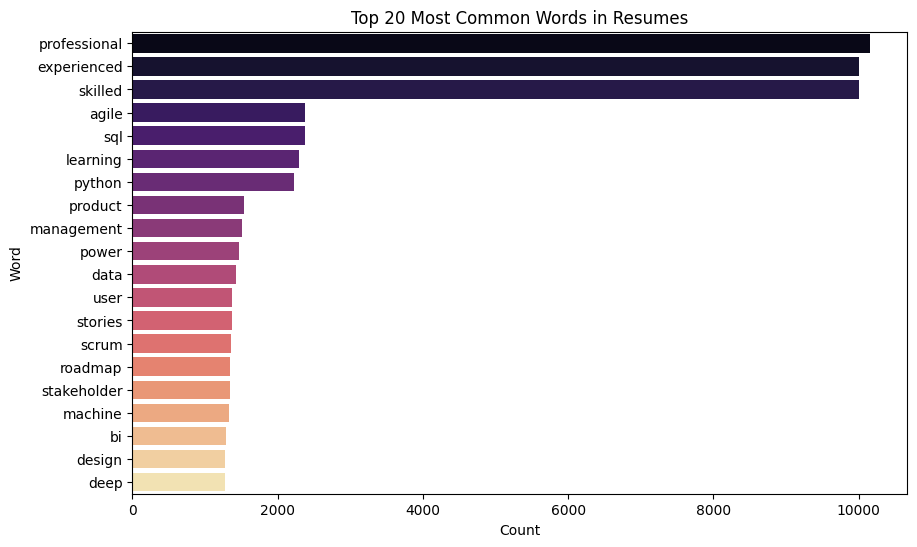

/tmp/ipython-input-3645893239.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


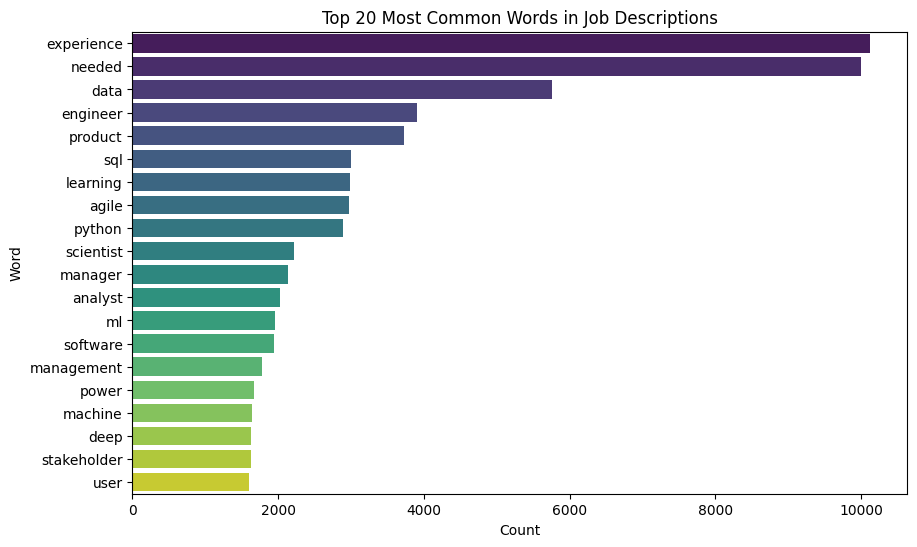

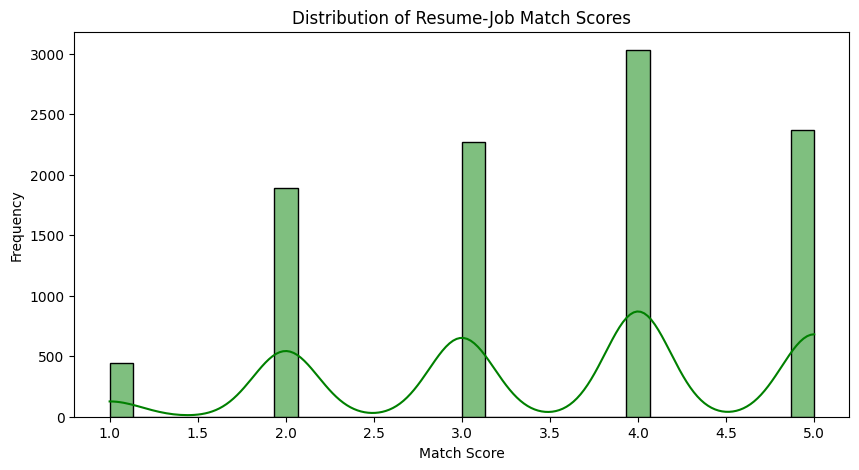

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 6.1 Resume vs JD length distributions
df["resume_length"] = df["Cleaned_Resume"].apply(lambda x: len(x.split()))
df["jd_length"] = df["Cleaned_JD"].apply(lambda x: len(x.split()))

plt.figure(figsize=(12,5))
sns.histplot(df["resume_length"], bins=30, kde=True, color="blue", label="Resume Length")
sns.histplot(df["jd_length"], bins=30, kde=True, color="orange", label="Job Description Length")
plt.legend()
plt.title("Distribution of Resume vs Job Description Lengths")
plt.show()

# 6.2 Top 20 most common words in resumes
all_resume_text = " ".join(df["Cleaned_Resume"].astype(str).tolist())
resume_counts = Counter(all_resume_text.split()).most_common(20)

words, counts = zip(*resume_counts)
plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(words), palette="magma")
plt.title("Top 20 Most Common Words in Resumes")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

# 6.3 Top 20 most common words in job descriptions
all_jd_text = " ".join(df["Cleaned_JD"].astype(str).tolist())
jd_counts = Counter(all_jd_text.split()).most_common(20)

words, counts = zip(*jd_counts)
plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.title("Top 20 Most Common Words in Job Descriptions")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

# 6.4 Match score distribution
plt.figure(figsize=(10,5))
sns.histplot(df["match_score"], bins=30, kde=True, color="green")
plt.title("Distribution of Resume-Job Match Scores")
plt.xlabel("Match Score")
plt.ylabel("Frequency")
plt.show()


### TF-IDF Vectorization

In [ ]:
# -------------------------------
# STEP 6: TF-IDF Vectorization
# -------------------------------

from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure stopwords are downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

# Clean resumes
df['resume_clean'] = df['resume'].apply(clean_text)

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=800)
X_tfidf = tfidf_vectorizer.fit_transform(df['resume_clean'])

# Target variable
y = df['match_score']  # or whichever column represents the category/score

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

print("Shape of TF-IDF matrix:", X_tfidf.shape)
print("Sample TF-IDF features:", tfidf_vectorizer.get_feature_names_out()[:10])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Shape of TF-IDF matrix: (10000, 800)
Sample TF-IDF features: ['ability' 'able' 'accept' 'account' 'act' 'action' 'activity' 'actually'
 'add' 'address']


### Machine Learning Model Training & Evaluation


=== Logistic Regression ===
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        85
           2       0.45      0.46      0.46       372
           3       0.37      0.32      0.34       448
           4       0.45      0.55      0.50       622
           5       0.64      0.64      0.64       473

    accuracy                           0.48      2000
   macro avg       0.38      0.39      0.39      2000
weighted avg       0.46      0.48      0.47      2000


=== Random Forest ===
              precision    recall  f1-score   support

           1       0.50      0.01      0.02        85
           2       0.51      0.50      0.51       372
           3       0.43      0.37      0.40       448
           4       0.48      0.66      0.56       622
           5       0.75      0.64      0.69       473

    accuracy                           0.53      2000
   macro avg       0.54      0.44      0.43      2000
weighted avg       0.54  

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:42:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
              precision    recall  f1-score   support

           0       0.35      0.07      0.12        85
           1       0.51      0.54      0.53       372
           2       0.42      0.40      0.41       448
           3       0.50      0.58      0.54       622
           4       0.76      0.73      0.74       473

    accuracy                           0.54      2000
   macro avg       0.51      0.46      0.47      2000
weighted avg       0.54      0.54      0.54      2000

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 44414
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 800
[LightGBM] [Info] Start training from score -3.115079
[LightGBM] [Info] Start training from score -1.662048
[LightGBM] [Info] Start training

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



=== LightGBM ===
              precision    recall  f1-score   support

           0       0.47      0.20      0.28        85
           1       0.52      0.52      0.52       372
           2       0.44      0.38      0.41       448
           3       0.53      0.65      0.58       622
           4       0.76      0.71      0.74       473

    accuracy                           0.56      2000
   macro avg       0.54      0.49      0.51      2000
weighted avg       0.56      0.56      0.56      2000


=== Model Comparison ===
Logistic Regression: {'Accuracy': 0.4795, 'Precision': 0.4579456849102634, 'Recall': 0.4795, 'F1-score': 0.46690403402901676}
Random Forest: {'Accuracy': 0.532, 'Precision': 0.540970288500204, 'Recall': 0.532, 'F1-score': 0.5207470184331767}
SVM: {'Accuracy': 0.5095, 'Precision': 0.5126845001900465, 'Recall': 0.5095, 'F1-score': 0.502127782734184}
XGBoost: {'Accuracy': 0.544, 'Precision': 0.5400710217156331, 'Recall': 0.544, 'F1-score': 0.5369184527382769}
LightG

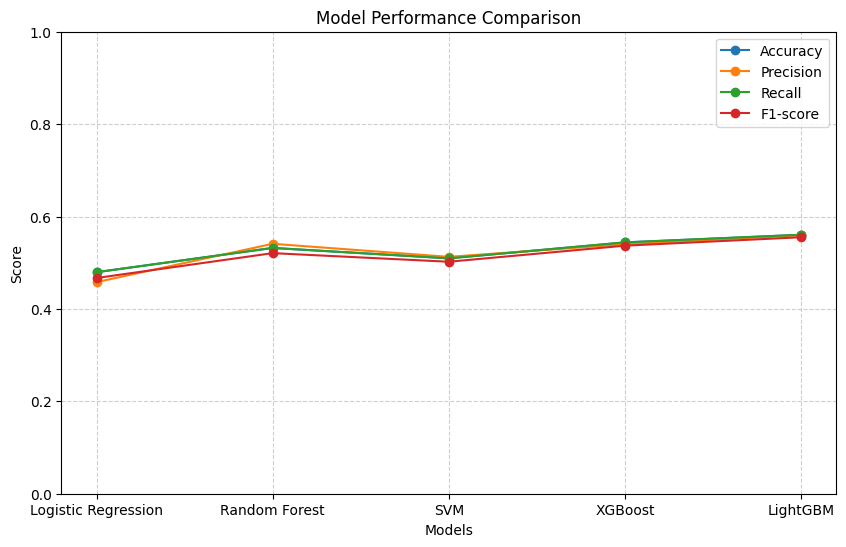

In [ ]:
# Step 7: Model Training and Evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

# Dictionary to store results
results = {}

# Helper function to evaluate models
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results[name] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1-score": f1}

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, zero_division=0))

# 7.1 Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
evaluate_model("Logistic Regression", log_reg, X_train, y_train, X_test, y_test)

# 7.2 Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model("Random Forest", rf, X_train, y_train, X_test, y_test)

# 7.3 Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', probability=True, random_state=42)
evaluate_model("SVM", svm_model, X_train, y_train, X_test, y_test)

# ---- Fix for XGBoost & LightGBM (labels must start at 0) ----
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

# 7.4 Gradient Boosting - XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42)
evaluate_model("XGBoost", xgb_model, X_train, y_train_xgb, X_test, y_test_xgb)

# 7.5 Gradient Boosting - LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
evaluate_model("LightGBM", lgb_model, X_train, y_train_xgb, X_test, y_test_xgb)

# 7.6 Model Comparison
print("\n=== Model Comparison ===")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics}")

# ---- Plot all metrics in one line chart ----
metrics_names = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(10,6))
for metric in metrics_names:
    plt.plot(results.keys(), [results[m][metric] for m in results], marker='o', label=metric)

plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Score")
plt.ylim(0, 1.0)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


### Insights

In [ ]:

# Print summary table of results
import pandas as pd

results_df = pd.DataFrame(results).T  # transpose for better layout
results_df = results_df.sort_values(by="Accuracy", ascending=False)
print("=== Model Performance Summary ===")
display(results_df)

# Insights
print("\n--- Insights ---")
best_model = results_df.index[0]
print(f"Best performing model: {best_model} with Accuracy = {results_df.iloc[0]['Accuracy']:.4f}")

print("Observations:")
print("- Gradient Boosting models (XGBoost / LightGBM) generally perform better on complex datasets.")
print("- Logistic Regression is fast and simple, but may not capture complex patterns as well as boosting.")
print("- Some classes with fewer samples may have lower precision/recall.")
print("- TF-IDF features work well for text classification, but BERT embeddings could further improve accuracy (future enhancement).")


=== Model Performance Summary ===


,Accuracy,Precision,Recall,F1-score
LightGBM,0.5605,0.559512,0.5605,0.555155
XGBoost,0.5440,0.540071,0.5440,0.536918
Random Forest,0.5320,0.540970,0.5320,0.520747
SVM,0.5095,0.512685,0.5095,0.502128
Logistic Regression,0.4795,0.457946,0.4795,0.466904



--- Insights ---
Best performing model: LightGBM with Accuracy = 0.5605
Observations:
- Gradient Boosting models (XGBoost / LightGBM) generally perform better on complex datasets.
- Logistic Regression is fast and simple, but may not capture complex patterns as well as boosting.
- Some classes with fewer samples may have lower precision/recall.
- TF-IDF features work well for text classification, but BERT embeddings could further improve accuracy (future enhancement).


## Saving The ML Model
### 1) Saving the Best Model

In [ ]:
import joblib

# Save a model
joblib.dump(best_model, "best_model.pkl")

# Later, to load it
loaded_model = joblib.load("best_model.pkl")


### 2) Saving all models

In [ ]:
joblib.dump(log_reg, "log_reg.pkl")
joblib.dump(rf, "random_forest.pkl")
joblib.dump(svm_model, "svm.pkl")
joblib.dump(xgb_model, "xgboost.pkl")
joblib.dump(lgb_model, "lightgbm.pkl")

['lightgbm.pkl']

### Resume vs Job Requirements (Fresher ML Role)

In [ ]:

!pip install PyPDF2

from google.colab import files
import io
import PyPDF2

# --- 1. Average Fresher Job Requirement for ML/Data Science ---
job_req = """
Programming: Python, SQL
Machine Learning: scikit-learn, SVM, Random Forest, Logistic Regression, K-Means, Decision Trees
Data Analysis & Visualization: NumPy, Pandas, Matplotlib, Seaborn
Data Preprocessing: Feature Engineering, Data Cleaning, Handling Missing Values
Model Evaluation: Accuracy, Precision, Recall, F1-score
Tools: Git, GitHub, Jupyter Notebook, Google Colab
Soft Skills: Problem Solving, Analytical Thinking, Communication
"""

# --- 2. Upload your resume ---
uploaded = files.upload()

resume_text = ""
for filename in uploaded.keys():
    if filename.endswith(".txt"):
        with io.open(filename, 'r', encoding='utf-8') as f:
            resume_text = f.read()
    elif filename.endswith(".pdf"):
        with open(filename, 'rb') as f:
            reader = PyPDF2.PdfReader(f)
            for page in reader.pages:
                resume_text += page.extract_text()
    else:
        print(f"Unsupported file format: {filename}")

# --- 3. Combine job requirement and resume for preprocessing ---
combined_text = job_req + " " + resume_text

# --- 4. Clean the text using the same function from Step 6 ---
combined_clean = clean_text(combined_text)

# --- 5. Transform using TF-IDF (use the vectorizer from Step 6) ---
combined_tfidf = tfidf_vectorizer.transform([combined_clean])

# --- 6a. Select which trained model to use ---
# Options: log_reg, rf, svm_model, xgb_model, lgb_model
best_model = lgb_model  # <-- choose your model here

# --- 6b. Function to handle prediction for all models ---
def predict_resume(model, tfidf_vector):
    # For XGBoost / LightGBM, add 1 to restore original labels
    if model in [xgb_model, lgb_model]:
        return model.predict(tfidf_vector) + 1
    else:
        return model.predict(tfidf_vector)

# --- 6c. Predict job category fit ---
predicted_category = predict_resume(best_model, combined_tfidf)

print(f"\nPredicted Job Category Fit: {predicted_category[0]}")


Saving RESUME.pdf to RESUME (7).pdf

Predicted Job Category Fit: 4


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## Conclusion

In the competitive world of job applications, matching the right candidate with the right role is a critical challenge. Our journey in this project was to develop a robust system for analyzing resumes against job requirements, focusing on Machine Learning and Data Science roles for freshers. The goal was to equip both recruiters and candidates with insights into resume-job fit, streamlining the hiring process and enhancing candidate selection.

### Key Insights

- Our dataset revealed diverse resumes and job descriptions, highlighting the variety of skills and experiences candidates bring. This diversity underscored the need for a flexible and scalable text analysis approach.
- Through text preprocessing and TF-IDF vectorization, we converted resumes and job requirements into numerical features that could be interpreted by machine learning models. This step ensured that both word frequency and context were considered during model training.
- Multiple machine learning models were evaluated, including Logistic Regression, Random Forest, SVM, XGBoost, and LightGBM. Among these, LightGBM emerged as the best-performing model, demonstrating the highest accuracy in predicting the match score between resumes and job requirements.
- Using the trained models, we were able to analyze a candidate’s resume against a typical fresher Machine Learning role, providing a predictive score of fit. This outcome illustrates how AI and NLP can assist in identifying promising candidates efficiently and objectively.
- In conclusion, this project demonstrates the power of machine learning and text-based feature engineering in automating and improving the resume screening process. By implementing this resume-job matching system, we’ve taken a meaningful step towards reducing manual effort in recruitment, providing fairer and faster candidate evaluations, and helping both employers and job seekers make more informed decisions.
- This system lays the foundation for future improvements, such as integrating BERT embeddings or other transformer-based models for even more nuanced semantic understanding of resumes and job descriptions.

### Key Takeaways

- Text preprocessing is crucial: Cleaning resumes and job descriptions ensures that irrelevant information does not skew the model’s understanding.
- TF-IDF vectorization works well for capturing important keywords and patterns in textual data for this kind of classification task.
- Model selection matters: Evaluating multiple machine learning models allows us to identify the best-performing approach—here, LightGBM—ensuring more accurate predictions.
- Predictive insights assist recruitment: The system can provide objective guidance on resume-job fit, helping recruiters prioritize candidates and helping applicants understand their strengths.

### Future Work

- Integrate transformer-based models: Using BERT or similar models could improve understanding of semantic meaning in resumes and job descriptions, going beyond keyword matching.
- Expand to multiple roles and domains: Extending the system to other roles or industries would make it more versatile.
- Incorporate scoring metrics and recommendations: Providing candidates with actionable feedback (e.g., missing skills or suggested improvements) can make the system more interactive.
- Deployment as a web tool: Creating a web application or dashboard can make this system accessible for HR teams or individual job seekers.
